In [44]:
import pandas as pd

# Giaever


In [53]:
pip install requests pandas chembl_webresource_client pubchempy

  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13819 sha256=5ceea7f49a1d3e47979d4b90917c097dd474f0d384b9e948131fbb40562bc488
  Stored in directory: /home/mercedesdg/.cache/pip/wheels/8b/e3/6c/3385b2db08b0985a87f5b117f98d0cb61a3ae3ca3bcbbd8307
Successfully built pubchempy
Note: you may need to restart the kernel to use updated packages.


In [54]:
import pandas as pd
import requests
from chembl_webresource_client.new_client import new_client
import pubchempy as pcp

In [47]:
df_giaever = pd.read_csv("/big/lab/mercedesdg/yeast-repo/yeast_repo_pipeline/data/Giaever.parsed",sep="\t",header=None)
df_giaever

,0,1,2
0,YGR267C,126941,methotrexate
1,YOR236W,126941,methotrexate
2,YLL048C,126941,methotrexate
3,YBL037W,126941,methotrexate
4,YNL256W,126941,methotrexate
...,...,...,...
246,YKR002W,21718,alverine-citrate
247,YIL048W,21718,alverine-citrate
248,YBL038W,21718,alverine-citrate
249,YIL171W,21718,alverine-citrate


In [55]:
# Buscar los nombres únicos en la columna 2 (compuestos)
unique_compounds = df_giaever[2].unique()

# Función para obtener el SMILES desde ChEMBL
def get_smiles_from_chembl(compound_name):
    # Consultamos ChEMBL usando su API
    molecule = new_client.molecule
    try:
        result = molecule.filter(ref_name__iexact=compound_name).only(['molecule_structures'])
        smiles = result[0]['molecule_structures']['canonical_smiles'] if result else None
    except Exception as e:
        print(f"Error buscando en ChEMBL para {compound_name}: {e}")
        smiles = None
    return smiles

# Función para obtener el abstract desde PubMed
def get_pubmed_abstract(compound_name):
    # Consultamos PubMed usando su API
    # Importar libreria de PubChem
    # Busca un compuesto por su nombre
    try:
        molecula = pcp.get_compounds(compound_name, 'name')
        smiles = molecula[0].isomeric_smiles
    except Exception as e:
        print(f"Error buscando en ChEMBL para {compound_name}: {e}")
        smiles = None
    return smiles

# Crear un DataFrame para almacenar los resultados
results = []

# Iterar sobre los compuestos únicos
for compound in unique_compounds:
    # Obtener SMILES de ChEMBL
    chembl_smiles = get_smiles_from_chembl(compound)
    # Obtener IDs de PubMed
    pubmed_smiles = get_pubmed_abstract(compound)
    
    # Guardar resultados
    results.append({
        'Compound': compound,
        'ChEMBL SMILES': chembl_smiles,
        'PubMed SMILES': pubmed_smiles
    })

# Convertir los resultados a un DataFrame
result_df = pd.DataFrame(results)

# Guardar el DataFrame en un archivo CSV
result_df.to_csv("compound_results.csv", index=False)

print("Script ejecutado con éxito. Resultados guardados en 'compound_results.csv'.")

Script ejecutado con éxito. Resultados guardados en 'compound_results.csv'.


In [58]:
unique_compounds

array(['methotrexate', '5-fluorouracil', 'cisplatin', 'atorvastatin',
       'lovastatin', 'miconazole', 'fenpropimorph', 'alverine-citrate',
       'dyclonine'], dtype=object)

In [ ]:
lista_compuestos = ["Methotrexate", "5-Fluorouracil", "Cisplatin", "Atorvastatin", "Lovastatin", "Miconazole", "Fluconazole", "Fenpropimorph", "Alverine citrate", "Dyclonine"]
# No está el Fluconazole!



In [56]:
result_df

,Compound,ChEMBL SMILES,PubMed SMILES
0,methotrexate,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...
1,5-fluorouracil,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl,C1=C(C(=O)NC(=O)N1)F
2,cisplatin,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl,N.N.Cl[Pt]Cl
3,atorvastatin,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl,CC(C)C1=C(C(=C(N1CC[C@H](C[C@H](CC(=O)O)O)O)C2...
4,lovastatin,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl,CC[C@H](C)C(=O)O[C@H]1C[C@H](C=C2[C@H]1[C@H]([...
5,miconazole,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl,C1=CC(=C(C=C1Cl)Cl)COC(CN2C=CN=C2)C3=C(C=C(C=C...
6,fenpropimorph,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl,C[C@@H]1CN(C[C@@H](O1)C)CC(C)CC2=CC=C(C=C2)C(C...
7,alverine-citrate,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl,CCN(CCCC1=CC=CC=C1)CCCC2=CC=CC=C2.C(C(=O)O)C(C...
8,dyclonine,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl,CCCCOC1=CC=C(C=C1)C(=O)CCN2CCCCC2


In [6]:
df = pd.read_csv("/big/lab/mercedesdg/yeast-repo/yeast_repo_pipeline/data/gene_drug_interaction",sep="\t")
df

,orf,smiles,author
0,YGR267C,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...,Giaever
1,YOR236W,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...,Giaever
2,YLL048C,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...,Giaever
3,YBL037W,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...,Giaever
4,YNL256W,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...,Giaever
...,...,...,...
322972,YJR066W,C1=CC(=C(C=C1Cl)CC2=C(C=CC(=C2)Cl)O)O,Wilenhain
322973,YJR066W,CC1=CC(=CC2=C1C(=O)C=C(O2)C3=CC=CC=C3)OC,Wilenhain
322974,YJR066W,C1(=C(C(=C(C(=C1Cl)Cl)Cl)Cl)Cl)O,Wilenhain
322975,YJR066W,C1=CC(=C(C=C1Cl)Cl)OCCCC(=O)O,Wilenhain


In [7]:
from rdkit import Chem

# Cargar el DataFrame (asumiendo que ya lo tenés cargado como df)
def get_inchikey(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return Chem.MolToInchiKey(mol)
    else:
        return None

# Agregar columna de InChIKey
df['inchikey'] = df['smiles'].apply(get_inchikey)

[16:47:32] Explicit valence for atom # 0 Cl, 1, is greater than permitted
[16:47:33] Explicit valence for atom # 0 Cl, 1, is greater than permitted
[16:47:33] Explicit valence for atom # 0 Cl, 1, is greater than permitted
[16:47:33] Explicit valence for atom # 0 Cl, 1, is greater than permitted
[16:47:33] Explicit valence for atom # 0 Cl, 1, is greater than permitted
[16:47:34] Explicit valence for atom # 0 Cl, 1, is greater than permitted
[16:47:34] Explicit valence for atom # 0 Cl, 1, is greater than permitted
[16:47:34] Explicit valence for atom # 0 Cl, 1, is greater than permitted
[16:47:34] Explicit valence for atom # 0 Cl, 1, is greater than permitted
[16:47:34] Explicit valence for atom # 0 Cl, 1, is greater than permitted
[16:47:35] Explicit valence for atom # 0 Cl, 1, is greater than permitted
[16:47:35] Explicit valence for atom # 0 Cl, 1, is greater than permitted
[16:47:35] Explicit valence for atom # 0 Cl, 1, is greater than permitted
[16:47:35] Explicit valence for atom #

In [26]:
df = df[df['inchikey'].notna()].reset_index(drop=True)
df = df.dropna(subset=['orf', 'inchikey'])
print(len(df))
df

321442


,orf,smiles,author,inchikey
0,YGR267C,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...,Giaever,FBOZXECLQNJBKD-UHFFFAOYSA-N
1,YOR236W,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...,Giaever,FBOZXECLQNJBKD-UHFFFAOYSA-N
2,YLL048C,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...,Giaever,FBOZXECLQNJBKD-UHFFFAOYSA-N
3,YBL037W,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...,Giaever,FBOZXECLQNJBKD-UHFFFAOYSA-N
4,YNL256W,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...,Giaever,FBOZXECLQNJBKD-UHFFFAOYSA-N
...,...,...,...,...
322266,YJR066W,C1=CC(=C(C=C1Cl)CC2=C(C=CC(=C2)Cl)O)O,Wilenhain,MDNWOSOZYLHTCG-UHFFFAOYSA-N
322267,YJR066W,CC1=CC(=CC2=C1C(=O)C=C(O2)C3=CC=CC=C3)OC,Wilenhain,JETSDIPTVSZMLI-UHFFFAOYSA-N
322268,YJR066W,C1(=C(C(=C(C(=C1Cl)Cl)Cl)Cl)Cl)O,Wilenhain,IZUPBVBPLAPZRR-UHFFFAOYSA-N
322269,YJR066W,C1=CC(=C(C=C1Cl)Cl)OCCCC(=O)O,Wilenhain,YIVXMZJTEQBPQO-UHFFFAOYSA-N


In [27]:
# Agrupar y contar genes únicos y compuestos únicos (por InChIKey)
resumen = df.groupby('author').agg(
    unique_compounds=('inchikey', 'nunique'),
    unique_genes=('orf', 'nunique')
).reset_index()
resumen

,author,unique_compounds,unique_genes
0,Giaever,9,226
1,Hillenmeyer,527,5744
2,Hoepfner,147,1520
3,Lee,341,156
4,Wilenhain,1964,242


In [42]:
import pandas as pd

# df tiene las columnas: 'author', 'orf', 'inchikey'

# Eliminar duplicados antes de hacer cualquier cálculo
df_clean = df.drop_duplicates(subset=['inchikey', 'orf'])

# Resumen previo (cantidad de compuestos y genes únicos por autor)
resumen = df_clean.groupby('author').agg(
    unique_compounds=('inchikey', 'nunique'),
    unique_genes=('orf', 'nunique')
).reset_index()

# Para mantener el orden original que quieras, podés hacer:
ordered_authors = df_clean['author'].drop_duplicates().tolist()

# Inicializamos sets para acumulación
all_compounds = set()
all_genes = set()
rows = []

for author in ordered_authors:
    sub_df = df_clean[df_clean['author'] == author]

    # Compuestos y genes del autor actual
    author_compounds = set(sub_df['inchikey'])
    author_genes = set(sub_df['orf'])
    author_tuples = set(zip(sub_df['inchikey'], sub_df['orf']))

    # Acumulación
    all_compounds.update(author_compounds)
    all_genes.update(author_genes)

    # Valores desde el resumen
    drugs = resumen.loc[resumen['author'] == author, 'unique_compounds'].values[0]
    targets = resumen.loc[resumen['author'] == author, 'unique_genes'].values[0]

    rows.append({
        'Author': author,
        'Drugs': drugs,
        'Drugs (cumul.)': len(all_compounds),
        'Targets': targets,
        'Targets (cumul.)': len(all_genes),
        'Drug-Target Tuples': len(author_tuples)
    })

summary_df = pd.DataFrame(rows)

# Ahora vamos a calcular las tuplas únicas del DataFrame limpio
unique_compounds_clean = df_clean['inchikey'].nunique()
unique_genes_clean = df_clean['orf'].nunique()

# Ver las tuplas únicas en el DataFrame limpio
cleaned_tuples = set(zip(df_clean['inchikey'], df_clean['orf']))
total_cleaned_tuples = len(cleaned_tuples)

# Mostrar resultados
print(f"Unique compounds (cleaned): {unique_compounds_clean}")
print(f"Unique genes (cleaned): {unique_genes_clean}")
print(f"Total Drug-Target Tuples (cleaned): {total_cleaned_tuples}")

# Mostrar el resumen por autor
summary_df



Unique compounds (cleaned): 2786
Unique genes (cleaned): 5811
Total Drug-Target Tuples (cleaned): 269941


,Author,Drugs,Drugs (cumul.),Targets,Targets (cumul.),Drug-Target Tuples
0,Giaever,9,9,226,226,251
1,Hillenmeyer,527,530,5744,5745,212663
2,Hoepfner,147,654,1477,5802,11326
3,Lee,325,968,144,5804,402
4,Wilenhain,1963,2786,242,5811,45299


In [43]:
sum_tuples = summary_df['Drug-Target Tuples'].sum()
print("Total Drug-Target Tuples:", sum_tuples)

unique_compounds = df['inchikey'].nunique()
unique_genes = df['orf'].nunique()

print(f"Unique compounds: {unique_compounds}")
print(f"Unique genes: {unique_genes}")

# Eliminar la columna 'author'
df_clean = df.drop(columns=['author'])
df_clean = df_clean.drop(columns=['smiles'])

# Eliminar filas duplicadas
df_clean = df_clean.drop_duplicates()

# Ver cuántas filas quedan
print(f"Filas restantes después de eliminar duplicados: {df_clean.shape[0]}")

# Ver las tuplas únicas en el DataFrame original
original_tuples = set(zip(df['inchikey'], df['orf']))
print(f"Tuplas únicas en el DataFrame original: {len(original_tuples)}")

# Ver las tuplas únicas en el DataFrame limpio
cleaned_tuples = set(zip(df_clean['inchikey'], df_clean['orf']))
print(f"Tuplas únicas en el DataFrame limpio: {len(cleaned_tuples)}")

Total Drug-Target Tuples: 269941
Unique compounds: 2786
Unique genes: 5811
Filas restantes después de eliminar duplicados: 269941
Tuplas únicas en el DataFrame original: 269941
Tuplas únicas en el DataFrame limpio: 269941


In [ ]:
df_clean.to_csv("/big/lab/mercedesdg/yeast-repo/yeast_repo_pipeline/data/gene_drug_interaction_to_process.csv")

# Figura

analizar las relaciones de cardinalidad (numero) de los datos. 

Cuantas relaciones 1 a 1 hay? 1 droga -> 1 gen

Cuantas relaciones 1 gen -> muchas drogas hay?

Cuantas relaciones 1 droga -> muchos genes hay?

Y en el medio se pueden cuantificar casos intermedios (1 gen -> no mas de 3, 5, 10 drogas; 1 droga -> no mas de 1, 2, 3, 5 genes?

In [59]:
df_figura = pd.read_csv("results/gdi_results.csv")
df_figura

,Unnamed: 0,orf,inchiKey
0,0,YBR154C,FVMVBNZVDHMILW-UHFFFAOYSA-N
1,40,YDL075W,FIVPIPIDMRVLAY-RBJBARPLSA-N
2,100,YDL082W,MBABOKRGFJTBAE-UHFFFAOYSA-N
3,128,YDR280W,OTKJDMGTUTTYMP-QZTJIDSGSA-N
4,204,YGR209C,FIVPIPIDMRVLAY-RBJBARPLSA-N
...,...,...,...
241,8762,YPL240C,FEBNTWHYQKGEIQ-UHFFFAOYSA-N
242,8834,YPL240C,IVYPNXXAYMYVSP-UHFFFAOYSA-N
243,8902,YGL167C,FEBNTWHYQKGEIQ-UHFFFAOYSA-N
244,8974,YLL041C,BPRHUIZQVSMCRT-UHFFFAOYSA-N


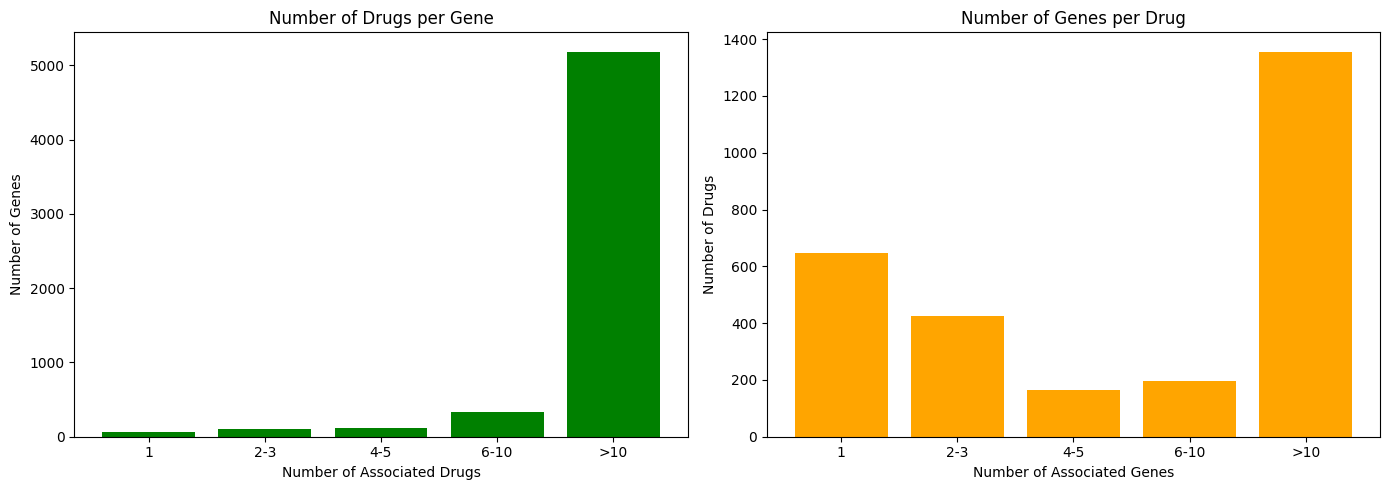

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargo tu dataframe filtrado
df = pd.read_csv("data/gene_drug_interaction_inchikey.csv")

# 1. Cuántas drogas tiene cada gen
gen_to_drugs = df.groupby('orf')['inchiKey'].nunique()

# 2. Cuántos genes tiene cada droga
drug_to_genes = df.groupby('inchiKey')['orf'].nunique()

# 3. Clasificamos los casos

def categorize(values):
    categories = values.apply(lambda x: (
        "1" if x == 1 else
        "2-3" if 2 <= x <= 3 else
        "4-5" if 4 <= x <= 5 else
        "6-10" if 6 <= x <= 10 else
        ">10"
    ))
    return categories

cat_gen = categorize(gen_to_drugs)
cat_drug = categorize(drug_to_genes)

# 4. Contamos las categorías
count_gen = cat_gen.value_counts().sort_index()
count_drug = cat_drug.value_counts().sort_index()

# 5. Graficamos
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gene -> Drugs
axs[0].bar(count_gen.index, count_gen.values, color='green')
axs[0].set_title('Number of Drugs per Gene')
axs[0].set_xlabel('Number of Associated Drugs')
axs[0].set_ylabel('Number of Genes')

# Drug -> Genes
axs[1].bar(count_drug.index, count_drug.values, color='orange')
axs[1].set_title('Number of Genes per Drug')
axs[1].set_xlabel('Number of Associated Genes')
axs[1].set_ylabel('Number of Drugs')

plt.tight_layout()
plt.show()


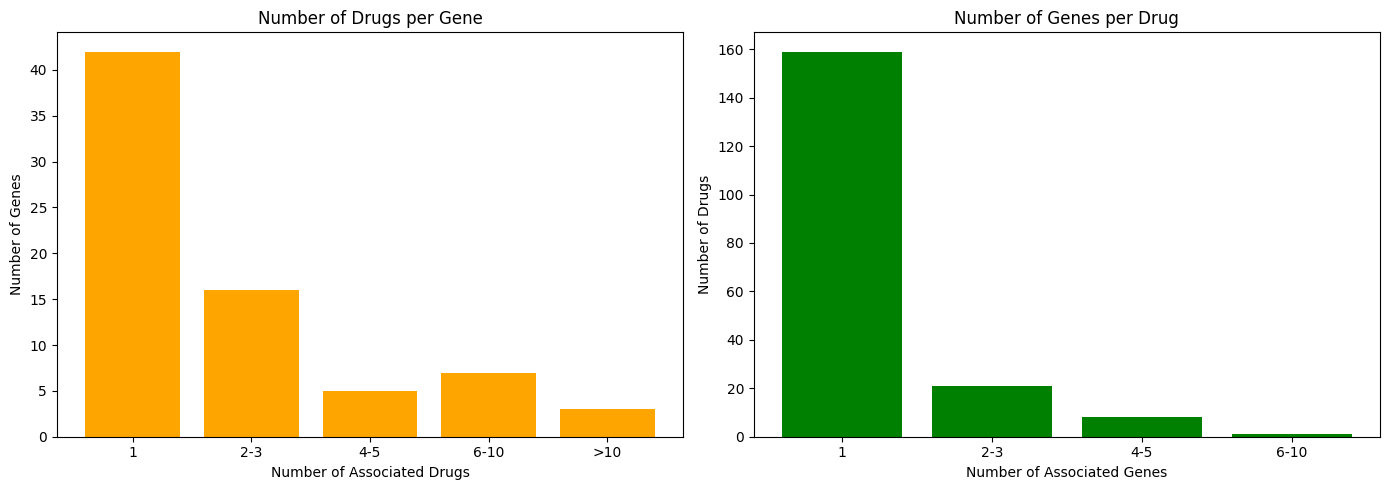

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargo tu dataframe filtrado
df = pd.read_csv("results/gdi_results.csv")

# 1. Cuántas drogas tiene cada gen
gen_to_drugs = df.groupby('gene_name_sce')['inchiKey'].nunique()

# 2. Cuántos genes tiene cada droga
drug_to_genes = df.groupby('inchiKey')['gene_name_sce'].nunique()

# 3. Clasificamos los casos

def categorize(values):
    categories = values.apply(lambda x: (
        "1" if x == 1 else
        "2-3" if 2 <= x <= 3 else
        "4-5" if 4 <= x <= 5 else
        "6-10" if 6 <= x <= 10 else
        ">10"
    ))
    return categories

cat_gen = categorize(gen_to_drugs)
cat_drug = categorize(drug_to_genes)

# 4. Contamos las categorías
count_gen = cat_gen.value_counts().sort_index()
count_drug = cat_drug.value_counts().sort_index()

# 5. Graficamos
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gene -> Drugs
axs[0].bar(count_gen.index, count_gen.values, color='orange')
axs[0].set_title('Number of Drugs per Gene')
axs[0].set_xlabel('Number of Associated Drugs')
axs[0].set_ylabel('Number of Genes')

# Drug -> Genes
axs[1].bar(count_drug.index, count_drug.values, color='green')
axs[1].set_title('Number of Genes per Drug')
axs[1].set_xlabel('Number of Associated Genes')
axs[1].set_ylabel('Number of Drugs')

plt.tight_layout()
plt.show()
